In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('00Table_no99.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17409 entries, 0 to 17408
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sw                       17409 non-null  float64
 1   lw                       17409 non-null  float64
 2   pre                      17409 non-null  float64
 3   u10                      17409 non-null  float64
 4   vpd                      17409 non-null  float64
 5   lh                       17409 non-null  float64
 6   mean_2m_air_temperature  17409 non-null  float64
 7   total_precipitation      17409 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:

import sys
import io

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error

In [18]:
data_all = np.array(data)
X = data_all[:, [i for i in range(data_all.shape[1]) if i not in [5]]]
y = data_all[ : , 5]

In [ ]:
#Train and split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)
#Define and Predict the model
tree1 = DecisionTreeRegressor(max_depth=2)
tree2 = RandomForestRegressor(max_depth=3)
tree1.fit(X_train , y_train)
tree2.fit(X_train , y_train)
y_pred1 = tree1.predict(X_test)
y_pred2 = tree2.predict(X_test)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

In [48]:
#kf = KFold(n_splits=5)
#for train, test in kf.split(X):    
#X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
tree1 = DecisionTreeRegressor(max_depth=2)
tree2 = RandomForestRegressor(max_depth=3)
tree1.fit(X_train , y_train)
tree2.fit(X_train , y_train)
y_pred1 = tree1.predict(X_test)
y_pred2 = tree2.predict(X_test)

In [49]:
# Calculate and print the evaluation metrics for decision Tree
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred1))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R-squared (R2) Score:", r2_score(y_test, y_pred1))

Mean Absolute Error (MAE): 28.342465651113773
Mean Squared Error (MSE): 1468.3407368398564
Root Mean Squared Error (RMSE): 38.318934442907675
R-squared (R2) Score: 0.3829525234515886


In [50]:
# Calculate and print the evaluation metrics for Random Forest
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred2))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred2))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred2)))
print("R-squared (R2) Score:", r2_score(y_test, y_pred2))

Mean Absolute Error (MAE): 23.873733064824005
Mean Squared Error (MSE): 1062.7486701386915
Root Mean Squared Error (RMSE): 32.599826228657896
R-squared (R2) Score: 0.5533963141786888


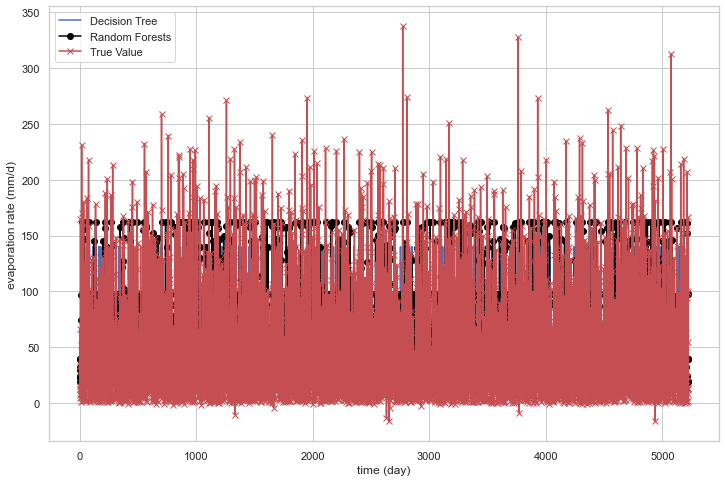

In [51]:
# plot the data
# Plot the data points
fig = plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
ax = fig.add_subplot(1, 1, 1)
line = ax.plot( y_pred1, c='b',label='Decision Tree')
plt.plot( y_pred2, marker='o', c='black',label='Random Forests')
plt.plot( y_test, marker='x', c='r',label='True Value')
# Set the y-axis label
plt.ylabel('evaporation rate (mm/d)')
# Set the x-axis label
plt.xlabel('time (day)')
plt.legend()
plt.show()

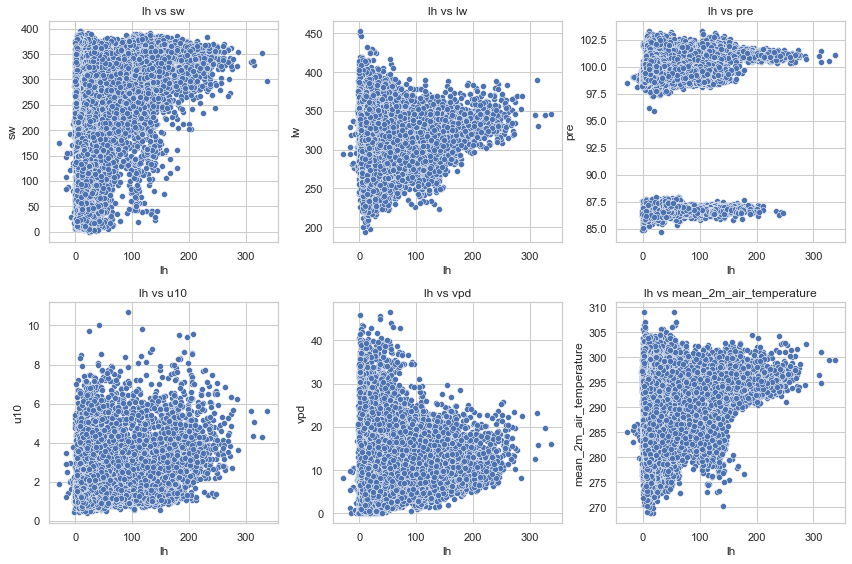

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot 'lh' vs 'sw'
sns.scatterplot(data=data1_fil, x='lh', y='sw', ax=axes[0, 0])
axes[0, 0].set_xlabel('lh')
axes[0, 0].set_ylabel('sw')
axes[0, 0].set_title('lh vs sw')

# Plot 'lh' vs 'lw'
sns.scatterplot(data=data1_fil, x='lh', y='lw', ax=axes[0, 1])
axes[0, 1].set_xlabel('lh')
axes[0, 1].set_ylabel('lw')
axes[0, 1].set_title('lh vs lw')

# Plot 'lh' vs 'pre'
sns.scatterplot(data=data1_fil, x='lh', y='pre', ax=axes[0, 2])
axes[0, 2].set_xlabel('lh')
axes[0, 2].set_ylabel('pre')
axes[0, 2].set_title('lh vs pre')

# Plot 'lh' vs 'u10'
sns.scatterplot(data=data1_fil, x='lh', y='u10', ax=axes[1, 0])
axes[1, 0].set_xlabel('lh')
axes[1, 0].set_ylabel('u10')
axes[1, 0].set_title('lh vs u10')

# Plot 'lh' vs 'vpd'
sns.scatterplot(data=data1_fil, x='lh', y='vpd', ax=axes[1, 1])
axes[1, 1].set_xlabel('lh')
axes[1, 1].set_ylabel('vpd')
axes[1, 1].set_title('lh vs vpd')

# Plot 'lh' vs 'mean_2m_air_temperature'
sns.scatterplot(data=data1_fil, x='lh', y='mean_2m_air_temperature', ax=axes[1, 2])
axes[1, 2].set_xlabel('lh')
axes[1, 2].set_ylabel('mean_2m_air_temperature')
axes[1, 2].set_title('lh vs mean_2m_air_temperature')

plt.tight_layout()
plt.show()

Decision Tree

coefficient of determination R^2 , decision Tree= 0.3829525234515886


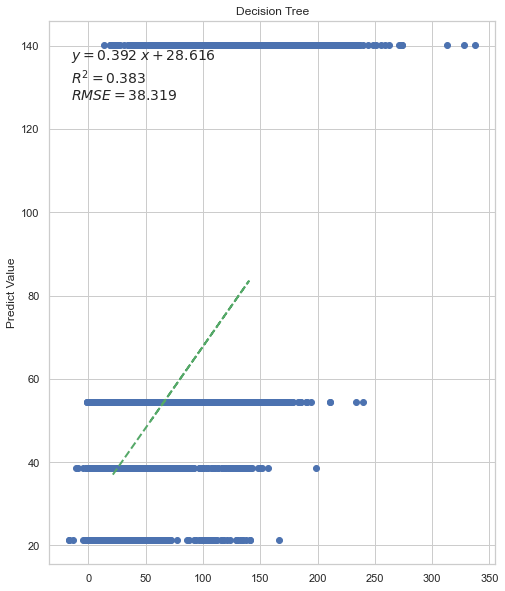

In [52]:
fig,ax=plt.subplots(1, 1, figsize=(8, 10), sharey=True)
ax.scatter( y_test , y_pred1, c='b')
z = np.polyfit(y_test , y_pred1, 1)

y_hat = np.poly1d(z)(y_pred1)
plt.plot(y_pred1,y_hat, "g--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test,y_pred1):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_pred1, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')

plt.ylabel('Predict Value')

plt.title('Decision Tree')
print("coefficient of determination R^2 , decision Tree=",r2_score(y_test,y_pred1))
plt.show()

Random Forests

coefficient of determination R^2 , random Forest= 0.5533963141786888


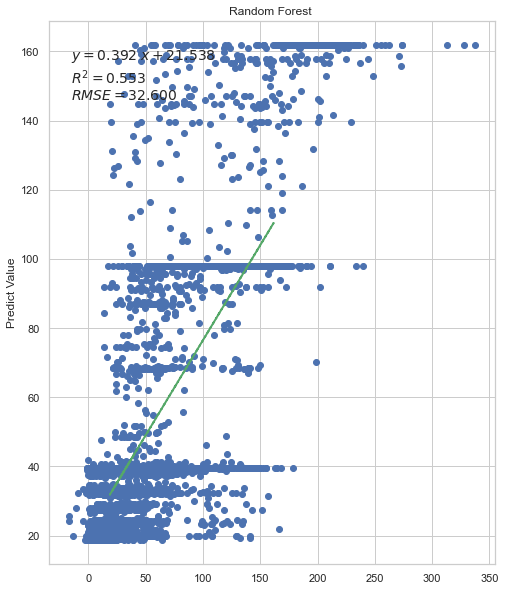

In [56]:
fig,ax=plt.subplots(1, 1, figsize=(8, 10), sharey=True)
ax.scatter( y_test , y_pred2, c='b')
z1 = np.polyfit(y_test , y_pred2, 1)
y_hat = np.poly1d(z1)(y_pred2)
plt.plot(y_pred2,y_hat, "g--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z1[1]:+0.3f}$\n$R^2 = {r2_score(y_test,y_pred2):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_pred2, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')

plt.ylabel('Predict Value')
print("coefficient of determination R^2 , random Forest=",r2_score(y_test,y_pred2))
plt.title('Random Forest ')
plt.show()

Learning curve

In [27]:
import numpy as np
from sklearn.model_selection import learning_curve

In [57]:
# Generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(tree2, X, y,  cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

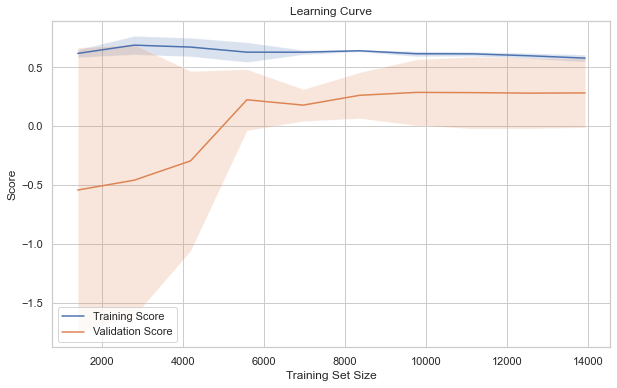

In [58]:
# Calculate the mean and standard deviation of training scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve

fig = plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()